In [1]:
# import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read csv
df = pd.read_csv('../data/data_clean.csv')

In [3]:
# check data
df.head()

,channel_name,user,real_name,text,text_length,reply_count,reply_users_count,replies_true,day_name,day_type,time,day_number,month,reactions_count,link_of_file,files_true,link_of_attachments,attachments_true,reaction_true
0,general,U01S79YDELR,Karina Condeixa,Hang told me to add it in education,35,0,0,False,Sunday,Weekend,08:00,9,May,0,nofile,False,nolink,False,False
1,general,U01S79YDELR,Karina Condeixa,What improved my score was adding metrics of a...,98,0,0,False,Sunday,Weekend,08:01,9,May,0,nofile,False,nolink,False,False
2,general,U01RRV4JX6Z,Francisco Ebeling,I feel like a slave to this dumb Resume Worded...,261,31,2,True,Sunday,Weekend,15:27,9,May,0,nofile,False,nolink,False,False
3,general,U01S79YDELR,Karina Condeixa,"Francisco, we have to remove the fancy/beautif...",76,0,0,False,Sunday,Weekend,15:30,9,May,0,nofile,False,nolink,False,False
4,general,U01RRV4JX6Z,Francisco Ebeling,"Ah, ok!",7,0,0,False,Sunday,Weekend,15:32,9,May,0,nofile,False,nolink,False,False


In [4]:
df.dtypes

channel_name           object
user                   object
real_name              object
text                   object
text_length             int64
reply_count             int64
reply_users_count       int64
replies_true             bool
day_name               object
day_type               object
time                   object
day_number              int64
month                  object
reactions_count         int64
link_of_file           object
files_true               bool
link_of_attachments    object
attachments_true         bool
reaction_true            bool
dtype: object

In [5]:
# make a copy
df_copy = df.copy()

In [6]:
# split numerical and categorical data into two dataframes
df_num = df.select_dtypes(include=['number'])
df_num.head()

,text_length,reply_count,reply_users_count,day_number,reactions_count
0,35,0,0,9,0
1,98,0,0,9,0
2,261,31,2,9,0
3,76,0,0,9,0
4,7,0,0,9,0


In [7]:
# split numerical and categorical data into two dataframes
df_cat = df.select_dtypes(include=['object', 'bool'])
df_cat.head()

,channel_name,user,real_name,text,replies_true,day_name,day_type,time,month,link_of_file,files_true,link_of_attachments,attachments_true,reaction_true
0,general,U01S79YDELR,Karina Condeixa,Hang told me to add it in education,False,Sunday,Weekend,08:00,May,nofile,False,nolink,False,False
1,general,U01S79YDELR,Karina Condeixa,What improved my score was adding metrics of a...,False,Sunday,Weekend,08:01,May,nofile,False,nolink,False,False
2,general,U01RRV4JX6Z,Francisco Ebeling,I feel like a slave to this dumb Resume Worded...,True,Sunday,Weekend,15:27,May,nofile,False,nolink,False,False
3,general,U01S79YDELR,Karina Condeixa,"Francisco, we have to remove the fancy/beautif...",False,Sunday,Weekend,15:30,May,nofile,False,nolink,False,False
4,general,U01RRV4JX6Z,Francisco Ebeling,"Ah, ok!",False,Sunday,Weekend,15:32,May,nofile,False,nolink,False,False


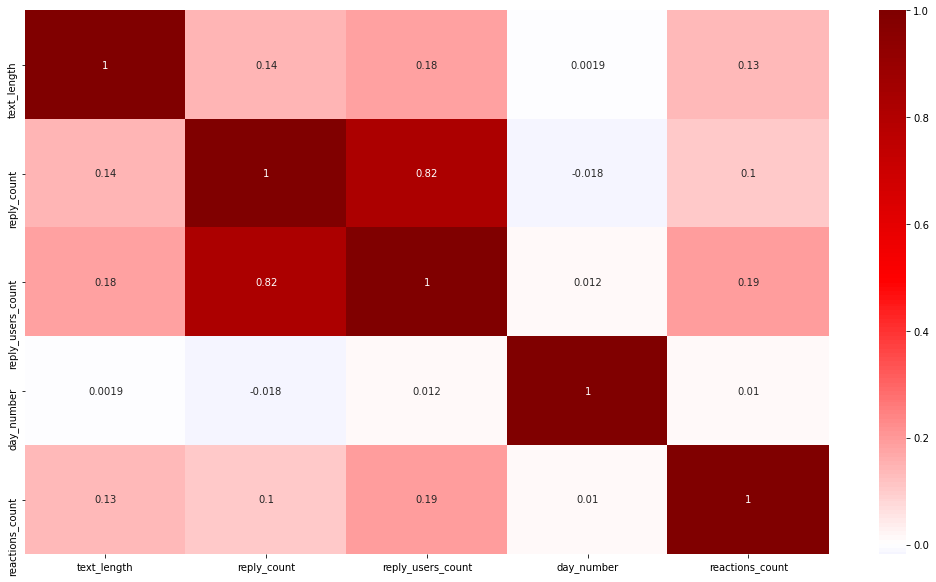

In [8]:
#correlation for numerial columns
corr_matrix = df_num.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='seismic', center = 0, annot=True);

In [9]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X = df_num

In [10]:
#check X
X.head(5)

,text_length,reply_count,reply_users_count,day_number,reactions_count
0,35,0,0,9,0
1,98,0,0,9,0
2,261,31,2,9,0
3,76,0,0,9,0
4,7,0,0,9,0


In [11]:
# normalize and transform
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [12]:
# concat variables into X df
X = pd.DataFrame(x_normalized, columns=X.columns)

In [13]:
X_cols = X.columns

In [14]:
#check columns to copy into cat dataframe
df_cat.columns

Index(['channel_name', 'user', 'real_name', 'text', 'replies_true', 'day_name',
       'day_type', 'time', 'month', 'link_of_file', 'files_true',
       'link_of_attachments', 'attachments_true', 'reaction_true'],
      dtype='object')

In [15]:
#encoding categorical features
cat = pd.get_dummies(df_cat, columns=['files_true',
       'replies_true', 'attachments_true', 'reaction_true'], drop_first = True)

In [16]:
# drop customer_number column
cat.drop(['channel_name', 'user', 'real_name', 'text', 'day_name',
       'day_type', 'time', 'month', 'link_of_file', 'link_of_attachments'], axis=1, inplace=True)

In [17]:
#test cat df
cat

,files_true_True,replies_true_True,attachments_true_True,reaction_true_True
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
4935,0,0,0,0
4936,0,0,0,0
4937,0,0,0,0
4938,0,0,0,1


In [18]:
# dropping the reaction_true column as that's what we wanna predict
cat_clean = cat.drop(['reaction_true_True'], axis=1)

In [19]:
# defining the target y
y = cat['reaction_true_True']

In [20]:
#checking the len of x_normalized & cat_clean before merginf back together in X
len(x_normalized), len(y), len(df)

(4940, 4940, 4940)

In [21]:
# bring the numerical data (scaled)in with the categorical
X = np.concatenate((x_normalized, cat_clean),axis=1)

In [22]:
#test
X

array([[0.96849293, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.9958095 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99240978, 0.11787243, 0.00760467, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98573643, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98787834, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99991321, 0.00184486, 0.00184486, ..., 0.        , 1.        ,
        0.        ]])

In [23]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [24]:
#train test split - splitting X and y each into 2 data sets(train data and test data)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [25]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [26]:
#perform prediction on the test set using predict()
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [27]:
#check the predictions array
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [28]:
#calculating the accuracy score
accuracy_score(y_test, predictions)

0.7975708502024291

In [29]:
#defining the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[1500,   11],
       [ 389,   76]])

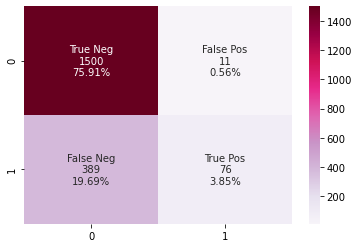

In [30]:
#visualizing the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='PuRd');

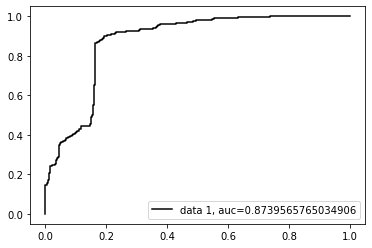

In [31]:
#visualising the ROC and AUC
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='k')
plt.legend(loc=4)
plt.show()